In [42]:
import pandas as pd
import numpy as np

In [43]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [45]:
df.shape

(600, 6)

In [46]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [47]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

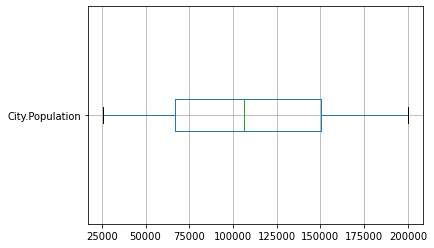

In [48]:
df.boxplot("City.Population",vert=False)

<AxesSubplot:>

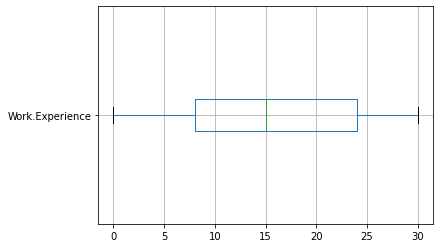

In [49]:
df.boxplot("Work.Experience",vert=False)

In [50]:
df["Taxable.Income"]=pd.cut(df["Taxable.Income"], bins=[0,30000,99620],labels=["Risky","Good"])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [51]:
Y=df["Taxable.Income"]

In [52]:
X1=df.iloc[:,:2]
X2=df.iloc[:,3:]

In [53]:
X=pd.concat([X1,X2],axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [54]:
## Standardization

In [55]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()

In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [57]:
X["Undergrad"]=LE.fit_transform(X["Undergrad"])

In [58]:
X["Undergrad"]=pd.DataFrame(X["Undergrad"])

In [59]:
X["Marital.Status"]=LE.fit_transform(X["Marital.Status"])

In [60]:
X["Marital.Status"]=pd.DataFrame(X["Marital.Status"])

In [61]:
X["Urban"]=LE.fit_transform(X["Urban"])
X["Urban"]=pd.DataFrame(X["Urban"])

In [62]:
X["City.Population"]=MM.fit_transform(X[["City.Population"]])
X["Work.Experience"]=MM.fit_transform(X[["Work.Experience"]])
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,0.139472,0.333333,1
1,1,0,0.622394,0.600000,1
2,0,1,0.772568,1.000000,1
3,1,2,0.962563,0.500000,1
4,0,1,0.010081,0.933333,0
...,...,...,...,...,...
595,1,0,0.078811,0.233333,1
596,1,0,0.170058,0.066667,1
597,0,0,0.737240,0.000000,1
598,1,1,0.886810,0.566667,0


In [63]:
Y=LE.fit_transform(df["Taxable.Income"])
Y=pd.DataFrame(Y)

In [64]:
## Training and testind data

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [66]:
X_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
145,0,0,0.986460,0.066667,1
9,1,0,0.745424,0.133333,1
375,0,1,0.604348,0.066667,0
523,0,0,0.094363,0.400000,0
188,0,0,0.642475,0.333333,0
...,...,...,...,...,...
71,0,2,0.459204,0.733333,0
106,1,2,0.188254,0.666667,1
270,0,1,0.602883,0.166667,0
435,0,0,0.494227,0.133333,1


In [67]:
X_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
110,0,2,0.038339,0.633333,1
419,0,1,0.645377,0.666667,0
565,0,0,0.030374,0.933333,0
77,1,1,0.531986,0.866667,0
181,0,0,0.059408,0.666667,0
...,...,...,...,...,...
399,0,2,0.279990,0.700000,0
340,1,1,0.164702,0.700000,1
148,0,1,0.984253,0.700000,0
494,0,2,0.984293,0.433333,1


In [68]:
Y_train

,0
145,0
9,0
375,0
523,0
188,1
...,...
71,0
106,1
270,0
435,0


In [69]:
Y_test

,0
110,1
419,0
565,0
77,0
181,1
...,...
399,0
340,0
148,0
494,0


In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
## Fitting the model

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
RF=RandomForestClassifier(max_depth=5,max_leaf_nodes=25)
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=25)

In [74]:
Y_predtrain=RF.predict(X_train)
Y_predtest=RF.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(Y_train,Y_predtrain)

0.7979166666666667

In [77]:
accuracy_score(Y_test,Y_predtest)

0.7833333333333333

In [37]:
## Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
d1={'max_depth':np.arange(0,50,1),'max_leaf_nodes':np.arange(0,50,1)}

In [40]:
Gridgb=GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=d1,
                    scoring=None)

In [78]:
Gridgb.fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
Gridgb.best_score_

In [ ]:
Gridgb.best_params_

In [ ]:
## Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf=RandomForestRegressor(max_depth=5,max_leaf_nodes=20)

In [82]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=20)

In [83]:
Y_predtrain=rf.predict(X_train)
Y_predtest=rf.predict(X_test)

In [84]:
from sklearn.metrics import r2_score

In [85]:
r2_score(Y_train,Y_predtrain)

0.22398927674332347

In [86]:
r2_score(Y_test,Y_predtest)

-0.02411421006899772

In [87]:
from sklearn.model_selection import GridSearchCV
d1={'max_depth':np.arange(0,50,1),
     'max_leaf_nodes':np.arange(0,50,1)}

In [88]:
Gridgb=GridSearchCV(estimator=RandomForestRegressor(),
                    param_grid=d1,
                    scoring=None)

In [89]:
Gridgb.fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
Gridgb.best_score_

In [ ]:
Gridgb.best_params_

In [97]:
## K fold

In [98]:
from sklearn.model_selection import KFold, cross_val_score

In [101]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
k_fold

KFold(n_splits=10, random_state=0, shuffle=True)

In [102]:
## Cross Val score

In [104]:
scores=cross_val_score(rf, X_train, Y_train, cv=k_fold)
print('Cross-validated scores:', scores)
print('Mean score:', np.mean(scores))

Cross-validated scores: [-0.235808   -0.29260816 -0.45168743 -0.07475924 -0.72977243 -0.20490992
 -0.46020198 -0.34750766 -0.26935783 -0.26194198]
Mean score: -0.3328554621127835


In [ ]:
## Gini Impurity

In [93]:
from sklearn.metrics import f1_score

In [94]:
rf_gini=RandomForestClassifier(criterion='gini', n_estimators=1000, random_state=42)
rf_gini.fit(X_train, Y_train)
gini_predictions = rf_gini.predict(X_test)
gini_f1 = f1_score(Y_test, gini_predictions, average='weighted')
print('F1 score using gini criterion:', gini_f1)

F1 score using gini criterion: 0.6714285714285715


In [95]:
## Entropy

In [96]:
rf_entropy=RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)
rf_entropy.fit(X_train, Y_train)
entropy_predictions=rf_entropy.predict(X_test)
entropy_f1=f1_score(Y_test, entropy_predictions, average='weighted')
print('F1 score using entropy criterion:', entropy_f1)

F1 score using entropy criterion: 0.6671451355661884
